In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
#Construct a dataset with noise
m = 100 #number of data points
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_new=np.linspace(-3, 3, 500).reshape(-1, 1)

In [ ]:
#Set hyperparamters
degree = 20

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


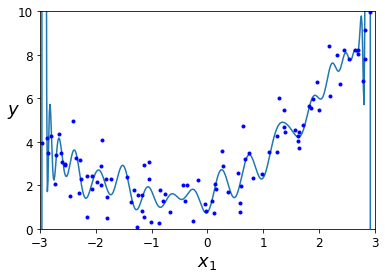

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#We are buildling a model y = (beta1 * X**2) + (beta2 * X) + beta3
#Our task is to approximate the values of beta1, beta2 and beta3

#PolynomialFeatures returns the design matrix X for the specified degree, see Matrix Algebra explanation given here: https://en.wikipedia.org/wiki/Polynomial_regression
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

#scale the data
std_scaler = StandardScaler()

#build the regression line using the features array
lin_reg = LinearRegression()

#construct a Pipeline for the regression task, Pipeline calls transform_fit on each part
polynomial_regression = Pipeline((
            ("poly_features", poly_features),
            ("std_scaler", std_scaler), 
            ("lin_reg", lin_reg), #https://en.wikipedia.org/wiki/Polynomial_regression
        ))
polynomial_regression.fit(X, y)

#use the model to build a line with the continous dataset
y_predict = polynomial_regression.predict(X_new)
plt.plot(X_new, y_predict)

#plot the original data
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()